In [1]:
from my_libs import *

In [27]:
method = 'self_minute'
robinhood  = robingateway()
back_day = 90
test = True
H = []
adf = []

tradeable = pd.DataFrame()
price = pd.DataFrame()
my_list = pd.read_csv("/home/ken/notebook/My_Trader2.0/file/cantrade.csv")

if test:
    print "Test mode is on!!"
    my_list =  my_list[0:5]

for i in my_list.Ticker:
    temp = mean_reversion(i,method = method, robinhood=robinhood)
    if  temp == "Hurst Exponent:mean reverting":
        H.append(i)
    if temp == "Augmented Dickey Fuller: significant":
        adf.append(i)

result = "Hurst Exponential >= 0.5: " + str(H) + '<br>' + "ADF TEST Significant: " + str(adf)
     
        


Test mode is on!!
If you use outside data feed please enter random inputs for the first two arguments
Connection Successful
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
***********************************************
**********AAPL*******************
Augmented Dickey Fuller test statistic = -0.8013741395377437
Augmented Dickey Fuller p-value = 0.8187180912508993
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.8637918437278587, '1%': -3.4354491526385345, '10%': -2.5679688996048387}
-0.12576434887437882
Halflife =  27.0


['AAPL', 'Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: 27.0 self_minute']
***********************************************
If you use outside data feed please enter random inputs for the first two arguments
Connection Successful
All price data of Close is actually Adj Close
Connection Successful
Finished BAC
***********************************************
**********BAC******

In [28]:
send_email(result, title="Mean Reversion Check")

To: <lgyhz1234@gmail.com>
From: <lgyhz1234@gmail.com>
Subject: Mean Reversion Check


In [5]:
mean_reversion('AAPL',method = 'self_minute', robinhood = robingateway())

If you use outside data feed please enter random inputs for the first two arguments
Connection Successful
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
***********************************************
**********AAPL*******************
Augmented Dickey Fuller test statistic = -0.8013741395377437
Augmented Dickey Fuller p-value = 0.8187180912508993
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.8637918437278587, '1%': -3.4354491526385345, '10%': -2.5679688996048387}
-0.12576434887437882
Halflife =  27.0


['AAPL', 'Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: 27.0 self_minute']
***********************************************


/home/ken/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['AAPL',
 'Augmented Dickey Fuller: Not significant',
 'Hurst Exponent:mean reverting',
 'Halflife: 27.0 self_minute']

In [3]:
plot_ticker(['AAPL'],[0],method = 'self_minute')

TypeError: plot_ticker() got multiple values for keyword argument 'method'

#### CDAF is for two time series cointegration

In [2]:
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.tsatools import lagmat, add_trend
from statsmodels.tsa.adfvalues import mackinnonp
 
def adf(ts, maxlag=1):
    """
    Augmented Dickey-Fuller unit root test
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)
     
    # Get the dimension of the array
    nobs = ts.shape[0]
         
    # Calculate the discrete difference
    tsdiff = np.diff(ts)
     
    # Create a 2d array of lags, trim invalid observations on both sides
    tsdall = lagmat(tsdiff[:, None], maxlag, trim='both', original='in')
    # Get dimension of the array
    nobs = tsdall.shape[0] 
     
    # replace 0 xdiff with level of x
    tsdall[:, 0] = ts[-nobs - 1:-1]  
    tsdshort = tsdiff[-nobs:]
     
    # Calculate the linear regression using an ordinary least squares model    
    results = OLS(tsdshort, add_trend(tsdall[:, :maxlag + 1], 'c')).fit()
    adfstat = results.tvalues[0]
     
    # Get approx p-value from a precomputed table (from stattools)
    pvalue = mackinnonp(adfstat, 'c', N=1)
    return pvalue
 
def cadf(x, y):
    """
    Returns the result of the Cointegrated Augmented Dickey-Fuller Test
    """
    # Calculate the linear regression between the two time series
    ols_result = OLS(x, y).fit()
     
    # Augmented Dickey-Fuller unit root test
    return adf(ols_result.resid)

In [39]:
user_input = get_price_data(['AAPL'],method = 'self_minute', robinhood = robingateway())
user_input = user_input.Close
# calculate standard deviation of differenced series using various lags
#lags = range(1, int(round(len(user_input)/5)))
#lags = range(1, len(user_input)-1)
tau = [sqrt(std(subtract(user_input[lag:], user_input[:-lag]))) for lag in lags]
# plot on log-log scale
#plot(log(lags), log(tau)); show()
# calculate Hurst as slope of log-log plot
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2.0
print 'hurst = ',hurst

All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
hurst =  -0.04564931401943534


In [2]:
stock1 = 'AAPL'
stock2 = 'AMZN'
data_len = 210

pair_trade(stock1,stock2,initial = 100000,robinhood =robingateway())

Rolling window = 3, Backtest length= 210
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AMZN


/home/ken/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ken/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:128: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/ken/.local/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:128: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Log return done, 10%
Signal Line done, 30%
Trade singal done, 60%
Finalizing, 90%
Done!


,AAPL_close,AMZN_close,AAPL_log_ret,AMZN_log_ret,AAPL_log_ret_mv,AMZN_log_ret_mv,relative,relative_mv,AAPL_volatility,AMZN_volatility,...,sell_line,AAPL_suggest_shares,AMZN_suggest_shares,AAPL_shares,AMZN_shares,trade,AAPL_value,AMZN_value,p_L,rolling_p_L
0,207.4800,1923.7700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.25,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
1,207.4800,1910.7200,0.000000,-0.006807,NaN,NaN,NaN,NaN,NaN,NaN,...,2.25,NaN,NaN,0,0,0,0.0,0.0,NaN,NaN
2,207.6420,1908.0746,0.000780,-0.001385,NaN,NaN,NaN,NaN,5.518922e-04,0.003833,...,2.25,NaN,NaN,0,0,0,0.0,0.0,0.0,NaN
3,207.6400,1905.8100,-0.000010,-0.001188,2.569538e-04,-3.126562e-03,-8.218413e-02,NaN,4.534242e-04,0.003189,...,2.25,NaN,NaN,0,0,0,0.0,0.0,-0.0,NaN
4,207.6085,1905.9250,-0.000152,0.000060,2.063817e-04,-8.375598e-04,-2.464083e-01,NaN,5.022452e-04,0.000784,...,1.25,NaN,NaN,0,0,0,0.0,0.0,0.0,0.0
5,207.6500,1907.4900,0.000200,0.000821,1.284237e-05,-1.021430e-04,-1.257293e-01,1.514406e-01,1.768701e-04,0.001014,...,2.25,418.0,6.0,0,0,0,0.0,0.0,0.0,0.0
6,207.7100,1908.8759,0.000289,0.000726,1.123550e-04,5.358066e-04,2.096933e-01,5.414810e-02,2.329848e-04,0.000414,...,1.25,456.0,2.0,0,0,0,0.0,0.0,0.0,0.0
7,207.9500,1907.6500,0.001155,-0.000642,5.478572e-04,3.015543e-04,1.816778e+00,6.335806e-01,5.275010e-04,0.000819,...,1.25,294.0,20.0,0,0,0,0.0,0.0,0.0,0.0
8,207.8200,1906.7600,-0.000625,-0.000467,2.727834e-04,-1.275917e-04,-2.137940e+00,3.715641e-02,8.901774e-04,0.000745,...,2.25,463.0,1.0,0,0,0,0.0,0.0,-0.0,0.0
9,207.6400,1906.0800,-0.000867,-0.000357,-1.123550e-04,-4.885859e-04,2.299597e-01,3.040096e-02,1.103985e-03,0.000144,...,2.25,467.0,1.0,0,0,0,0.0,0.0,-0.0,0.0


In [4]:
re = statsmodels.regression.linear_model.OLS(price1.Close,price2.Close).fit()

In [3]:
cadf(price1.Close,price2.Close)

0.4417458603503728

In [3]:
port = price1.Close + cadf(price1.Close,price2.Close)*price2.Close

NameError: global name 'OLS' is not defined

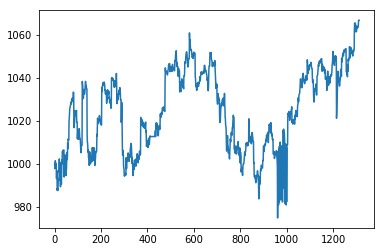

In [24]:
plt.plot(port)

In [25]:
adf(port)

0.06872605291948662

Text(0.5,1,'F-Distribution dfn:2, dfd:147')

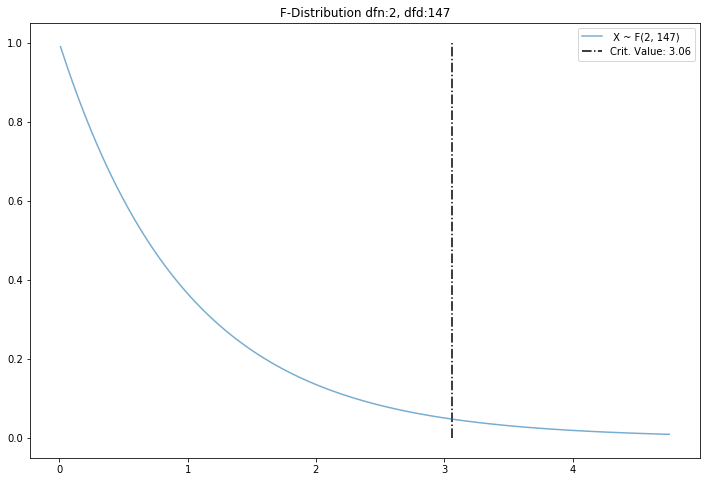

In [7]:
from scipy.stats import f, norm

# Set figure 
plt.figure(figsize=(12, 8))

# Set degrees of freedom
dfn, dfd = 2, 147
rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

x = np.linspace(f.ppf(0.01, dfn, dfd), 
                f.ppf(0.99, dfn, dfd), 100)

# Plot values
plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
         label=' X ~ F({}, {})'.format(dfn, dfd))
plt.vlines(rejection_reg, 0.0, 1.0, 
           linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
plt.legend()
plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))


In [ ]:
from my_libs import *


def remember_spot(x):
    with open("meanreversion_pair.txt","w") as p:
        p.writelines(x)

def write_result(x):
    with open("meanreversion_result_pair.txt","a") as p:
        p.writeline(x)

method = 'self_minute'
robinhood  = robingateway()
back_day = 90
test = False
H = []
adf = []

tradeable = pd.DataFrame()
price = pd.DataFrame()
my_list = pd.read_csv("/home/ken/notebook/My_Trader2.0/file/cantrade.csv")


if test:
    print "Test mode is on!!"
    my_list =  my_list[0:5]

elif start_over:
    print "Starting over"

else:
    with open("meanreversion_pair.txt", "r") as p:
        done = p.readlines()
        done = done[0].split(",")

for i in range(len(my_list.Ticker)):
    for j in range(len(my_list.Ticker[i:])):    
        if str(i) in done and str(j) in done:
            continue
        try:
            print 'Pair:' + my_list.Ticker[i] +", " + my_list.Ticker[j]
            price1 = get_price_data([my_list.Ticker[i]],method = 'day', robinhood = robingateway())
            price2 = get_price_data([my_list.Ticker[j]],method = 'day', robinhood = robingateway())
            hr = cadf(price1.Close,price2.Close)
            port = price1.Close + hr*price2.Close
            temp = mean_reversion(0,"self_minute",port)
            if  temp == "Hurst Exponent:mean reverting":
                H.append(i)
                send_email(temp +" : "+ str(H), title="Mean Reversion Check")
                write_result(temp +" : "+ str(H))
            if temp == "Augmented Dickey Fuller: significant":
                adf.append(i)
                send_email(temp +" : "+ str(adf), title="Mean Reversion Check")
                write_result(temp +" : "+ str(adf))
            remember_spot(str(i)+","+str(j))

        except Exception as e:
            print e
            print "ERROR"

            continue 
result = "Hurst Exponential >= 0.5: " + str(H) + '<br>' + "ADF TEST Significant: " + str(adf)
     
send_email(result, title="Mean Reversion Check")

Pair:AAPL, BAC
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished BAC
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.4288489788156467
Augmented Dickey Fuller p-value = 0.9972413373314157
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
0.0018200139296874933


/home/ken/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Halflife =  -101.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -101.0 self_minute']
***********************************************
Pair:AAPL, AMZN
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AMZN
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = -2.345715426109736
Augmented Dickey Fuller p-value = 0.15764726536858065
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.911939409384601, '1%': -3.5463945337644063, '10%': -2.5936515282964665}
-0.14426622127406544
Halflife =  3.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: 3.0 self_minute']
***********************************************
Pair:AAPL, T
All price data of 

Finished AMAT
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.403896183532342
Augmented Dickey Fuller p-value = 0.997131769961368
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
-0.00012581245421736624
Halflife =  -117.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -117.0 self_minute']
***********************************************
Pair:AAPL, AMGN
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AMGN
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller tes

Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AGN
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.6286211807626794
Augmented Dickey Fuller p-value = 0.9979409516537091
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
0.028441693001992487
Halflife =  -48.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -48.0 self_minute']
***********************************************
Pair:AAPL, APA
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished APA
If you use outside data feed please enter random inputs for the first two arguments
********

Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished ACAD
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.198668430650367
Augmented Dickey Fuller p-value = 0.995976670353914
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
-0.029697687041298337
Halflife =  -122.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -122.0 self_minute']
***********************************************
Pair:AAPL, PANW
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished PANW
If you use outside data feed please enter random inputs for the first two arguments
**************************

Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished NVS
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.5884789679150542
Augmented Dickey Fuller p-value = 0.9978225967332397
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
0.00986618695476221
Halflife =  -96.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -96.0 self_minute']
***********************************************
Pair:AAPL, ANF
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished ANF
If you use outside data feed please enter random inputs for the first two arguments
*******************************

Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AZN
If you use outside data feed please enter random inputs for the first two arguments
***********************************************
**********0*******************
Augmented Dickey Fuller test statistic = 1.7290372582893774
Augmented Dickey Fuller p-value = 0.9981973820959669
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'5%': -2.913766394626147, '1%': -3.5506699942762414, '10%': -2.5946240473991997}
0.02174309417127297
Halflife =  -62.0


['Augmented Dickey Fuller: Not significant', 'Hurst Exponent:mean reverting', 'Halflife: -62.0 self_minute']
***********************************************
Pair:AAPL, AES
All price data of Close is actually Adj Close
Connection Successful
Finished AAPL
All price data of Close is actually Adj Close
Connection Successful
Finished AES
If you use outside data feed please enter random inputs for the first two arguments
*******************************

In [6]:
 get = get_price_data([my_list.Ticker[i]],method = 'day', robinhood = robingateway()).Open

All price data of Close is actually Adj Close
Connection Successful
Finished AAPL


In [7]:
variance_ratio(get)

0.8194042987746524

In [85]:
with open("meanreversion_pair.txt", "r") as p:
    
    done = p.readlines()
    done = done[0].split(",")


In [12]:
my_list = pd.read_csv("/home/ken/notebook/My_Trader2.0/file/cantrade.csv")

0